In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree
# 예측 / 회귀 random forest
from sklearn.ensemble import RandomForestRegressor
matplotlib.rc('font', family = 'Malgun Gothic') 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale, minmax_scale, robust_scale

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rc('font', family = 'Malgun Gothic') 

# RMSE:root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 가설


1. 대기오염(CO, NO2, SO2, O3)이 미세먼지 발생량의 영향을 끼친다.
2. 기온이 미세먼지 발생량에 영향을 끼친다.

# 데이터 불러오기

In [253]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/AIR_POLLUTION.CSV",
                    parse_dates= ['MeasDate'])
df_raw

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21
363,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63
364,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58


# 데이터 특성 확인

In [254]:
df_raw.info()

# 총 366개이고 co와 03, PM10, NO2, SO2에서 결측치가 있고 
# MeasDate는 날짜 속성을 가진다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   366 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       366 non-null    float64       
 7   RAIN       366 non-null    float64       
 8   WIND       366 non-null    float64       
 9   WIND_DIR   366 non-null    int64         
 10  HUMIDITY   366 non-null    float64       
 11  ATM_PRESS  366 non-null    float64       
 12  SNOW       366 non-null    float64       
 13  CLOUD      366 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 40.2 KB


In [6]:
df_raw.shape

# 총 366행과 14열을 가진다

(366, 14)

In [7]:
df_raw.describe()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000000,365.000000,365.000000,311.000000,365.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,33.421918,0.023600,0.026814,0.517042,0.003033,13.863798,0.381639,2.225301,209.450820,60.295082,1005.848907,0.022951,5.064016
std,15.937983,0.011896,0.010271,0.152820,0.000632,9.830280,1.122127,0.723171,70.735018,14.534983,8.126823,0.222361,2.986119
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000,0.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.492500,0.000000,1.722500,160.250000,49.650000,999.400000,0.000000,2.510000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,14.000000,0.000000,2.095000,221.000000,61.050000,1006.450000,0.000000,5.310000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.070000,0.115000,2.620000,266.000000,69.950000,1011.575000,0.000000,7.570000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,11.800000,5.880000,351.000000,95.000000,1025.500000,3.200000,10.000000


RAIN과 SNOW 변수의 경우 최댓값과 평균을 비교하면 이상치가 있는 것처럼 보인다.
비가 오는 날과 안오는날 / 눈이 오는 날과 오지 않는 날을 구분할 필요가 보인다

In [8]:
df_raw.isnull().sum()

#co, 03, PM10, NO2, SO2에서 결측치가 보인다.
# 미세먼지는 목표변수의 결측치는 제거해야 할 필요가 있다고 판단된다. 

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

<AxesSubplot:>

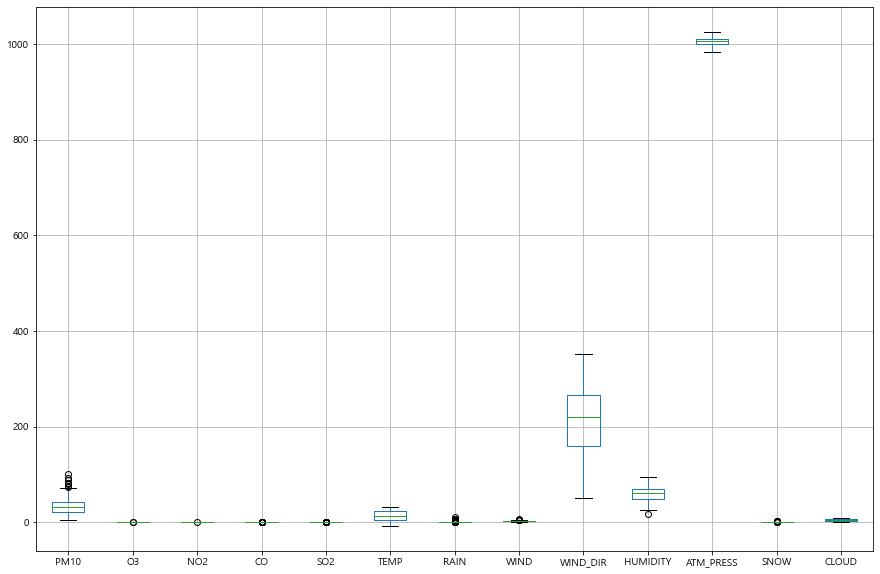

In [9]:
df_raw.boxplot(figsize= (15,10))

# 이것을 보고 이상치를 확인하기에는 어렵다

<AxesSubplot:>

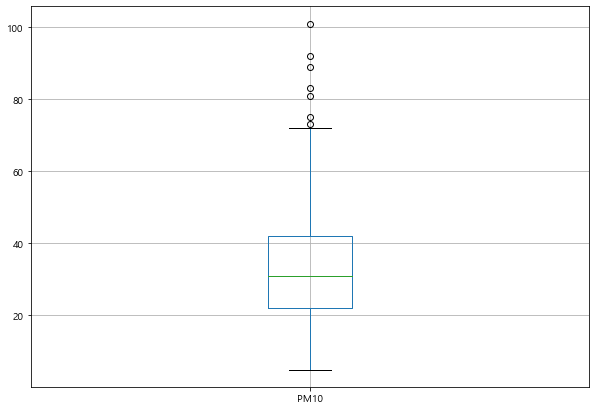

In [10]:
df_raw.boxplot('PM10',figsize= (10,7))

# 미세먼지에대한 boxplot를 보면 이상치가 있어보이지만 찾아본 결과 미세먼지의 농도는 매우 나쁠 경우 151ug/m^3 까지 가기때문에 
# 이상치로 판단 되지 는 않는다.

<AxesSubplot:>

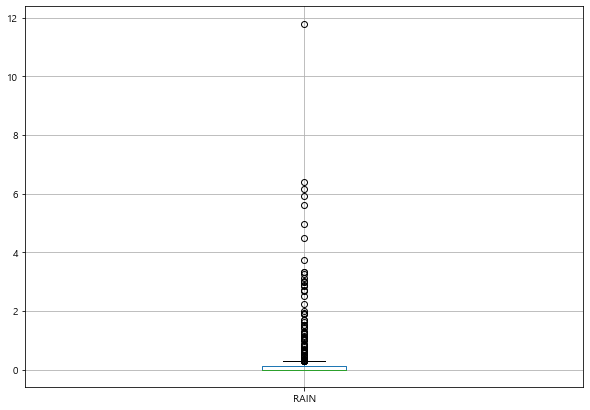

In [11]:
df_raw.boxplot('RAIN',figsize= (10,7))
# RAIN에 대한 이상치가 많이 보이는 것을 알 수 있다. 데이터상 비가 오지 않는 날이 0 으로 표시가 되어서 이상치가 발생했다고 판단된다.

<AxesSubplot:>

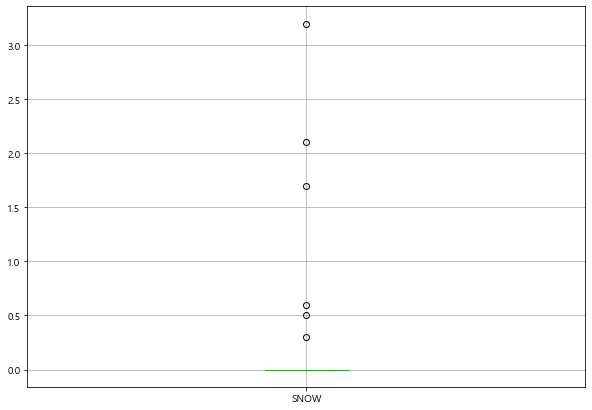

In [12]:
df_raw.boxplot('SNOW',figsize= (10,7))

# SNOW 에 대한 이상치가 많이 보이는 것을 알 수 있다. 데이터상 눈 오지 않는 날이 0 으로 표시가 되어서 이상치가 발생했다고 판단된다.

<AxesSubplot:>

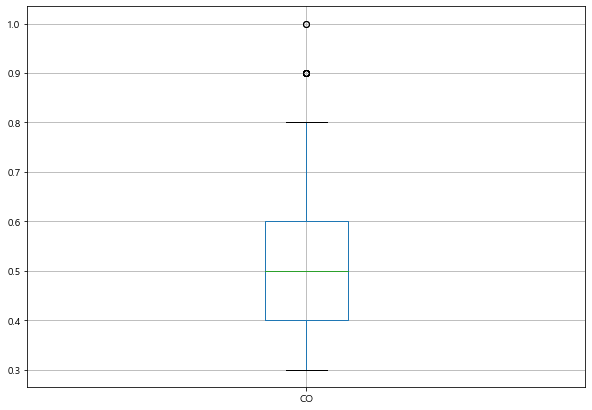

In [13]:
df_raw.boxplot('CO',figsize= (10,7))

# 일산화탄소의 농도의 경우 0.9와 1.0이 충분히 가능한 수치이다. 그러므로 이상치를 제거 하지 않는 것으로 판단

<AxesSubplot:>

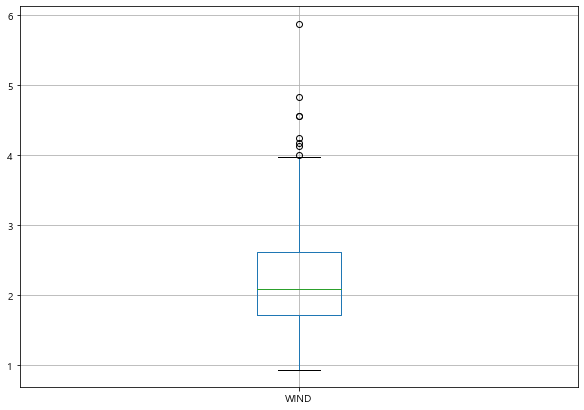

In [326]:
df_raw.boxplot('WIND',figsize= (10,7))

# 풍속의 경우 6m/s 일경우와 4~5m/s도 충분히 가능한 풍속이다 이상치로 처리하지 않는다.

# 데이터 전처리

In [14]:
# 미세먼지 PM10에 결측치 값이 1개 있음을 확인했다.
# 목표변수로 사용할 것이므로 결측치가 있는 행을 삭제해주도록 한다. 

In [15]:
df_raw.loc[df_raw.isnull()['PM10']]
# PM10에 결측치 값이 있는 곳을 인덱싱 한다.
# 인데싱 328번에 결측치 값 존재 확인.

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
328,2020-05-24,NaN,NaN,NaN,NaN,NaN,17.48,1.45,2.85,257,83.3,999.4,0.0,8.21


In [255]:
df_raw.drop([328], inplace = True)

In [17]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   365 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       365 non-null    float64       
 7   RAIN       365 non-null    float64       
 8   WIND       365 non-null    float64       
 9   WIND_DIR   365 non-null    int64         
 10  HUMIDITY   365 non-null    float64       
 11  ATM_PRESS  365 non-null    float64       
 12  SNOW       365 non-null    float64       
 13  CLOUD      365 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 42.8 KB


In [18]:
df_raw.isnull().sum()

# PM10의 결측치가 있는 행을 삭제하면서 1개씩 있던 결측치가 사라지고 CO에만 54개가 있음

MeasDate      0
PM10          0
O3            0
NO2           0
CO           54
SO2           0
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

In [19]:
df_raw.shape
# 365행 14열로 한행이 줄어들음

(365, 14)

In [256]:
df_raw.reset_index(drop=True, inplace = True)
df_raw
# 인덱스를 재배열 해줌

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73
361,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21
362,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63
363,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58


In [257]:
# CO 결측치는 평균값으로 대체해준다
df_raw['CO'].agg('mean')

0.5170418006430879

In [258]:
df_raw['CO'].fillna(df_raw['CO'].agg('mean'), inplace = True)

In [259]:
df_raw.isnull().sum()
# 더이상 결측치가 없음을 확인

MeasDate     0
PM10         0
O3           0
NO2          0
CO           0
SO2          0
TEMP         0
RAIN         0
WIND         0
WIND_DIR     0
HUMIDITY     0
ATM_PRESS    0
SNOW         0
CLOUD        0
dtype: int64

파생변수생성

# 탐색적 분석 - 변수간의 관계 파악하기

array([[<AxesSubplot:title={'center':'MeasDate'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'O3'}>,
        <AxesSubplot:title={'center':'NO2'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'TEMP'}>,
        <AxesSubplot:title={'center':'RAIN'}>],
       [<AxesSubplot:title={'center':'WIND'}>,
        <AxesSubplot:title={'center':'WIND_DIR'}>,
        <AxesSubplot:title={'center':'HUMIDITY'}>,
        <AxesSubplot:title={'center':'ATM_PRESS'}>],
       [<AxesSubplot:title={'center':'SNOW'}>,
        <AxesSubplot:title={'center':'CLOUD'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

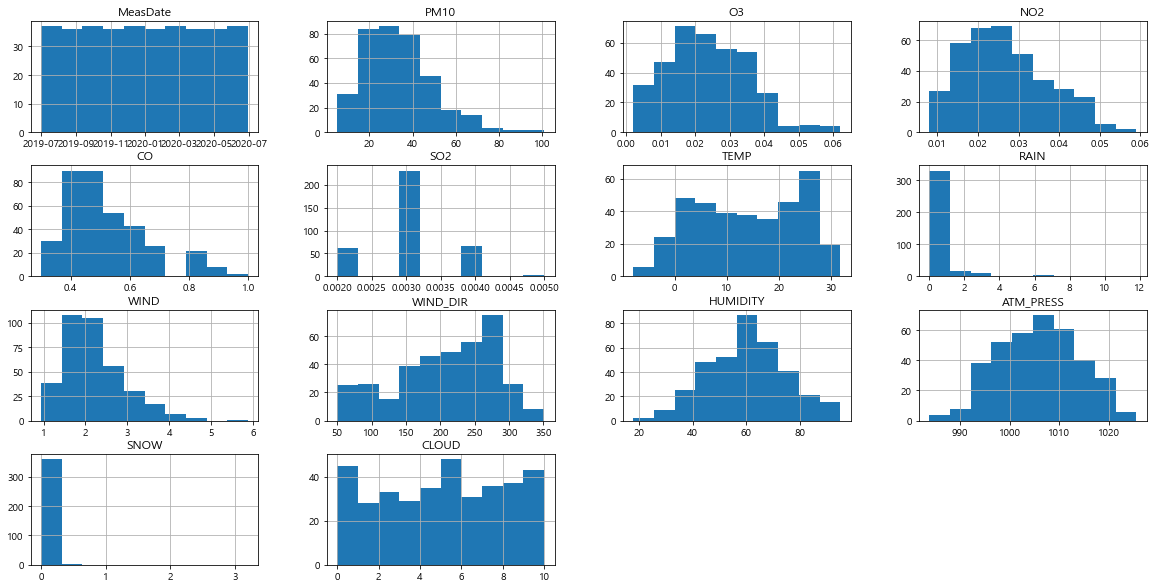

In [27]:
df_raw.hist(figsize = (20,10))

SO2, SNOW, RAIN의 분포는 고르지 않음을 알 수 있다.

In [26]:
df_raw['SO2'].unique()

# SO2 는 값이 4개 뿐이다.

array([0.003, 0.002, 0.004, 0.005])

In [260]:
mean = df_raw['CO'].agg('mean')

In [261]:
df_raw['CO_mean'] = np.where(df_raw['CO']>mean, 'high', 'low')

CO가 평균보다 높으면 high, 낮으면 low 를 가지는 파생변수 만듬

<AxesSubplot:xlabel='CO_mean', ylabel='PM10'>

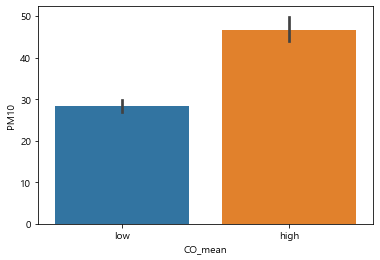

In [262]:
sns.barplot( x = 'CO_mean', y='PM10', data = df_raw)

CO 가 평균 이상인 집단이 미세먼지 발생량이 더 많은 것으로 보인다.

In [263]:
df_raw['NO2_mean'] = np.where(df_raw['NO2']>df_raw['NO2'].agg('mean'), 'high', 'low')

NO2가 평균보다 높으면 high, 낮으면 low 를 가지는 파생변수 만듬

<AxesSubplot:xlabel='NO2_mean', ylabel='PM10'>

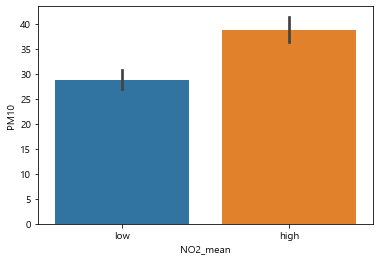

In [264]:
sns.barplot( x = 'NO2_mean', y='PM10', data = df_raw)

NO2 가 평균 이상인 집단이 미세먼지 발생량이 더 많은 것으로 보인다.

In [265]:
df_raw['O3_mean'] = np.where(df_raw['O3']>df_raw['O3'].agg('mean'), 'high', 'low')

<AxesSubplot:xlabel='O3_mean', ylabel='PM10'>

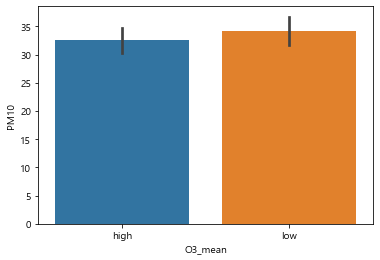

In [129]:
sns.barplot( x = 'O3_mean', y='PM10', data = df_raw)

O3는 미세먼지 발생량에 큰 영향을 끼치지 않을 것으로 추측한다.

In [266]:
df_raw['_SNOW_'] = np.where(df_raw['SNOW'] ==0, 'np_snow', 'snow')

눈이 오는 날은 snow 안오는 날은 no_snow 라는 파생변수를 만든다.

<AxesSubplot:xlabel='_SNOW_', ylabel='PM10'>

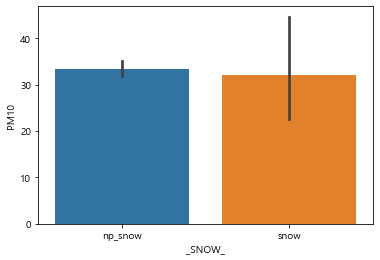

In [131]:
sns.barplot( x = '_SNOW_', y='PM10', data = df_raw)

눈이 오는지 안오는지에 따라서 미세먼지의 발생량은 크게 차이가 없어보인다.

분석하는데에 제외 시켜야할지 않을까라는 생각이 드는 변수이다.

In [267]:
df_raw['_RAIN_'] = np.where(df_raw['RAIN'] ==0, 'no_rain', 'rain')

비가 오는 날은 rain 안오는 날은 no_rain 라는 파생변수를 만든다.

<AxesSubplot:xlabel='_RAIN_', ylabel='PM10'>

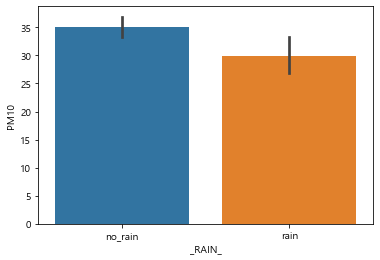

In [133]:
sns.barplot( x = '_RAIN_', y='PM10', data = df_raw)

비가 오는지 안오는지에 따라서 미세먼지의 발생량은 크게 차이가 없어보인다.

분석하는데에 제외 시켜야할지 않을까라는 생각이 드는 변수이다.

<AxesSubplot:xlabel='TEMP', ylabel='PM10'>

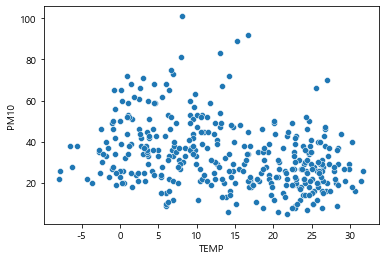

In [76]:
sns.scatterplot(x = 'TEMP', y= 'PM10', data = df_raw)

온도가 낮을수록 미세먼지 발생량이 더 많은 것으로 보인다. 봄, 겨울이 여름, 가을보다 더 많이 미세먼지 발생량이 많을수도 있겠다라는 생각이 든다.

<AxesSubplot:xlabel='O3', ylabel='PM10'>

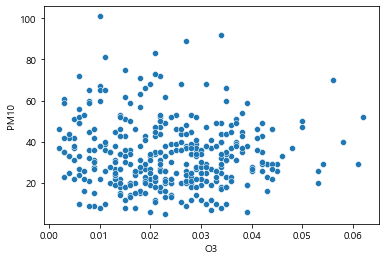

In [77]:
sns.scatterplot(x = 'O3', y= 'PM10', data = df_raw)

오존의 영향은 크게 없을 것같다는 추측이든다

<AxesSubplot:xlabel='NO2', ylabel='PM10'>

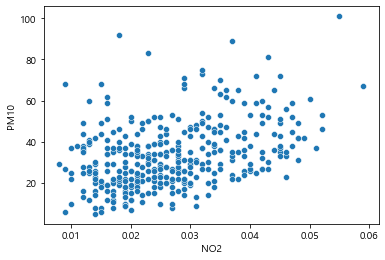

In [78]:
sns.scatterplot(x = 'NO2', y= 'PM10', data = df_raw)

NO2가 증가할수록 미세먼지 발생량이 증가할 것이라고 추측을 해본다

<AxesSubplot:xlabel='SO2', ylabel='PM10'>

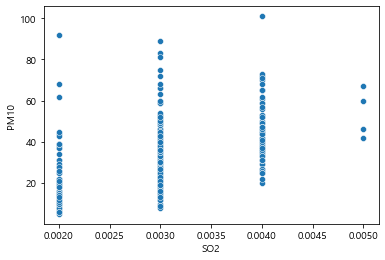

In [42]:
sns.scatterplot(x = 'SO2', y= 'PM10', data = df_raw)

SO2는 큰 영향을 끼치는 것같지는 않다.

<AxesSubplot:xlabel='CO', ylabel='PM10'>

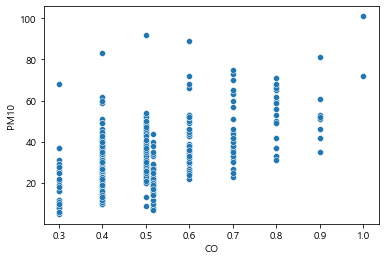

In [323]:
sns.scatterplot(x = 'CO', y= 'PM10', data = df_raw)

<AxesSubplot:xlabel='HUMIDITY', ylabel='PM10'>

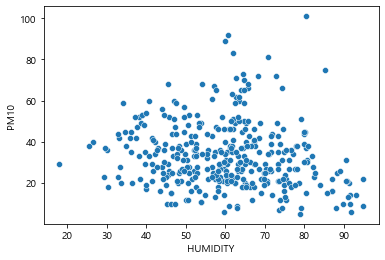

In [43]:
sns.scatterplot(x = 'HUMIDITY', y= 'PM10', data = df_raw)

습도의 영향은 크게 없어보임을 추측할 수있다.

<AxesSubplot:xlabel='WIND', ylabel='PM10'>

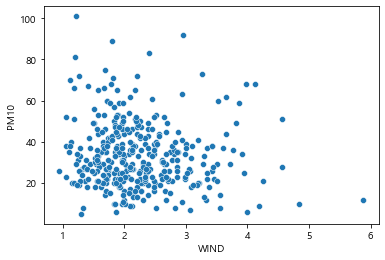

In [44]:
sns.scatterplot(x = 'WIND', y= 'PM10', data = df_raw)

바람의 풍속이 셀수록 미세먼지 발생량이 낮다고 추측할 수 있다.

<AxesSubplot:xlabel='ATM_PRESS', ylabel='PM10'>

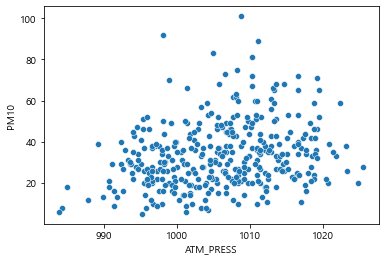

In [45]:
sns.scatterplot(x = 'ATM_PRESS', y= 'PM10', data = df_raw)

기압이 높아질수록 미세먼지 발생량이 증가한다고 확실하게 볼 수는 없을 것 같다.

<AxesSubplot:xlabel='CLOUD', ylabel='PM10'>

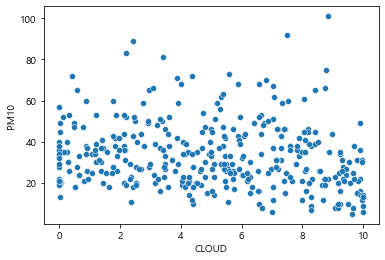

In [46]:
sns.scatterplot(x = 'CLOUD', y= 'PM10', data = df_raw)

전우량은 미세먼지 발생에 영향을 주지 않는다고 추측한다.

<AxesSubplot:xlabel='WIND_DIR', ylabel='PM10'>

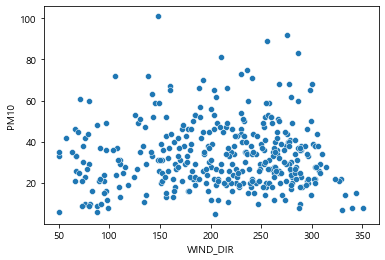

In [47]:
sns.scatterplot(x = 'WIND_DIR', y= 'PM10', data = df_raw)

Text(0.5, 0, 'MeasDate')

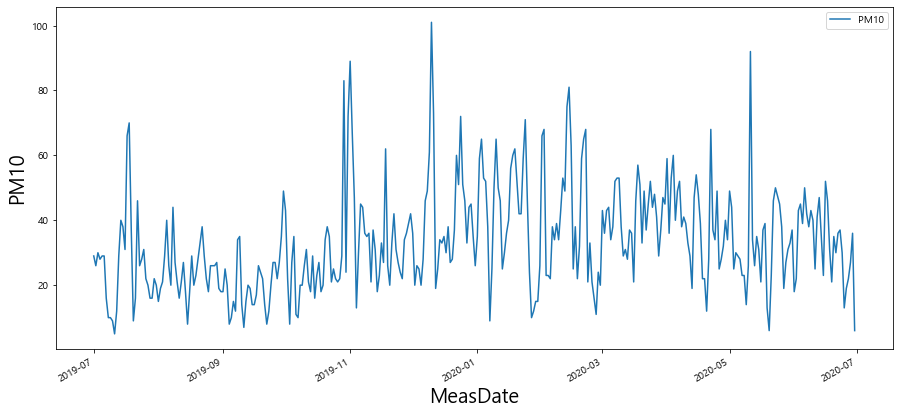

In [268]:
df_raw.plot(x="MeasDate", y="PM10", figsize=(15,7))
plt.ylabel("PM10", fontsize=20)
plt.xlabel("MeasDate", fontsize=20)

시계열 분석 그래프를 이용하여 날짜 별로 미세먼지양을 확인했다.

11월~ 5월 인 겨울에서 봄에 미세먼지양이 더 많을것으로 추축된다.

In [134]:
df_raw.corr().round(3)

# 상관관계 확인

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
PM10,1.000,-0.052,0.396,0.548,0.429,-0.310,-0.121,-0.100,0.020,-0.150,0.253,-0.020,-0.172
O3,-0.052,1.000,-0.592,-0.509,-0.234,0.516,-0.104,0.165,0.269,-0.038,-0.534,0.004,-0.119
NO2,0.396,-0.592,1.000,0.786,0.563,-0.237,0.029,-0.537,-0.408,-0.066,0.420,-0.121,0.017
CO,0.548,-0.509,0.786,1.000,0.559,-0.340,0.037,-0.412,-0.320,0.057,0.385,-0.056,0.037
SO2,0.429,-0.234,0.563,0.559,1.000,-0.274,-0.129,-0.253,-0.093,-0.302,0.334,-0.103,-0.191
TEMP,-0.310,0.516,-0.237,-0.340,-0.274,1.000,0.077,-0.216,-0.050,0.404,-0.792,-0.185,0.342
RAIN,-0.121,-0.104,0.029,0.037,-0.129,0.077,1.000,0.126,-0.183,0.397,-0.236,0.019,0.358
WIND,-0.100,0.165,-0.537,-0.412,-0.253,-0.216,0.126,1.000,0.235,-0.084,-0.054,0.146,0.017
WIND_DIR,0.020,0.269,-0.408,-0.320,-0.093,-0.050,-0.183,0.235,1.000,-0.099,0.068,0.108,-0.297
HUMIDITY,-0.150,-0.038,-0.066,0.057,-0.302,0.404,0.397,-0.084,-0.099,1.000,-0.510,0.022,0.628


PM10과 NO2, CO, SO2, TEMP ,ATM_PRESS 사이에서 상관관계가 있어보인다.

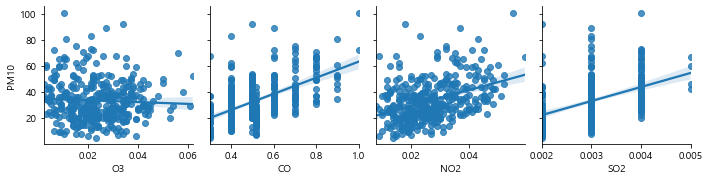

In [49]:
sns.pairplot(df_raw, y_vars="PM10", x_vars=['O3', 'CO','NO2','SO2'], kind = "reg")

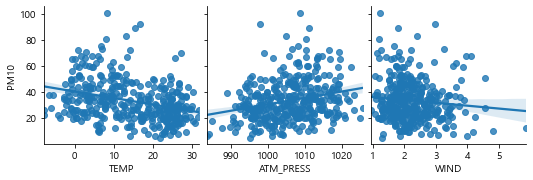

In [50]:
sns.pairplot(df_raw, y_vars = 'PM10', x_vars = ['TEMP', 'ATM_PRESS','WIND'], kind = 'reg')

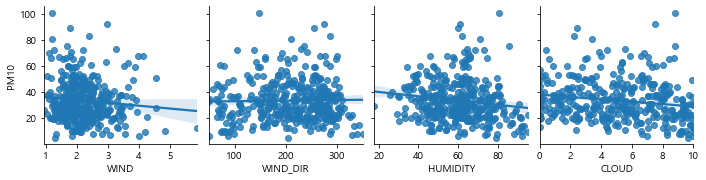

In [324]:
sns.pairplot(df_raw, y_vars = 'PM10', x_vars = ['WIND', 'WIND_DIR','HUMIDITY','CLOUD'], kind = 'reg')

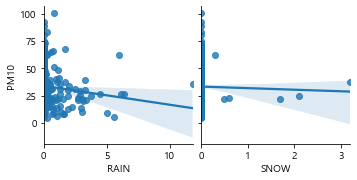

In [325]:
sns.pairplot(df_raw, y_vars = 'PM10', x_vars = ['RAIN', 'SNOW'], kind = 'reg')

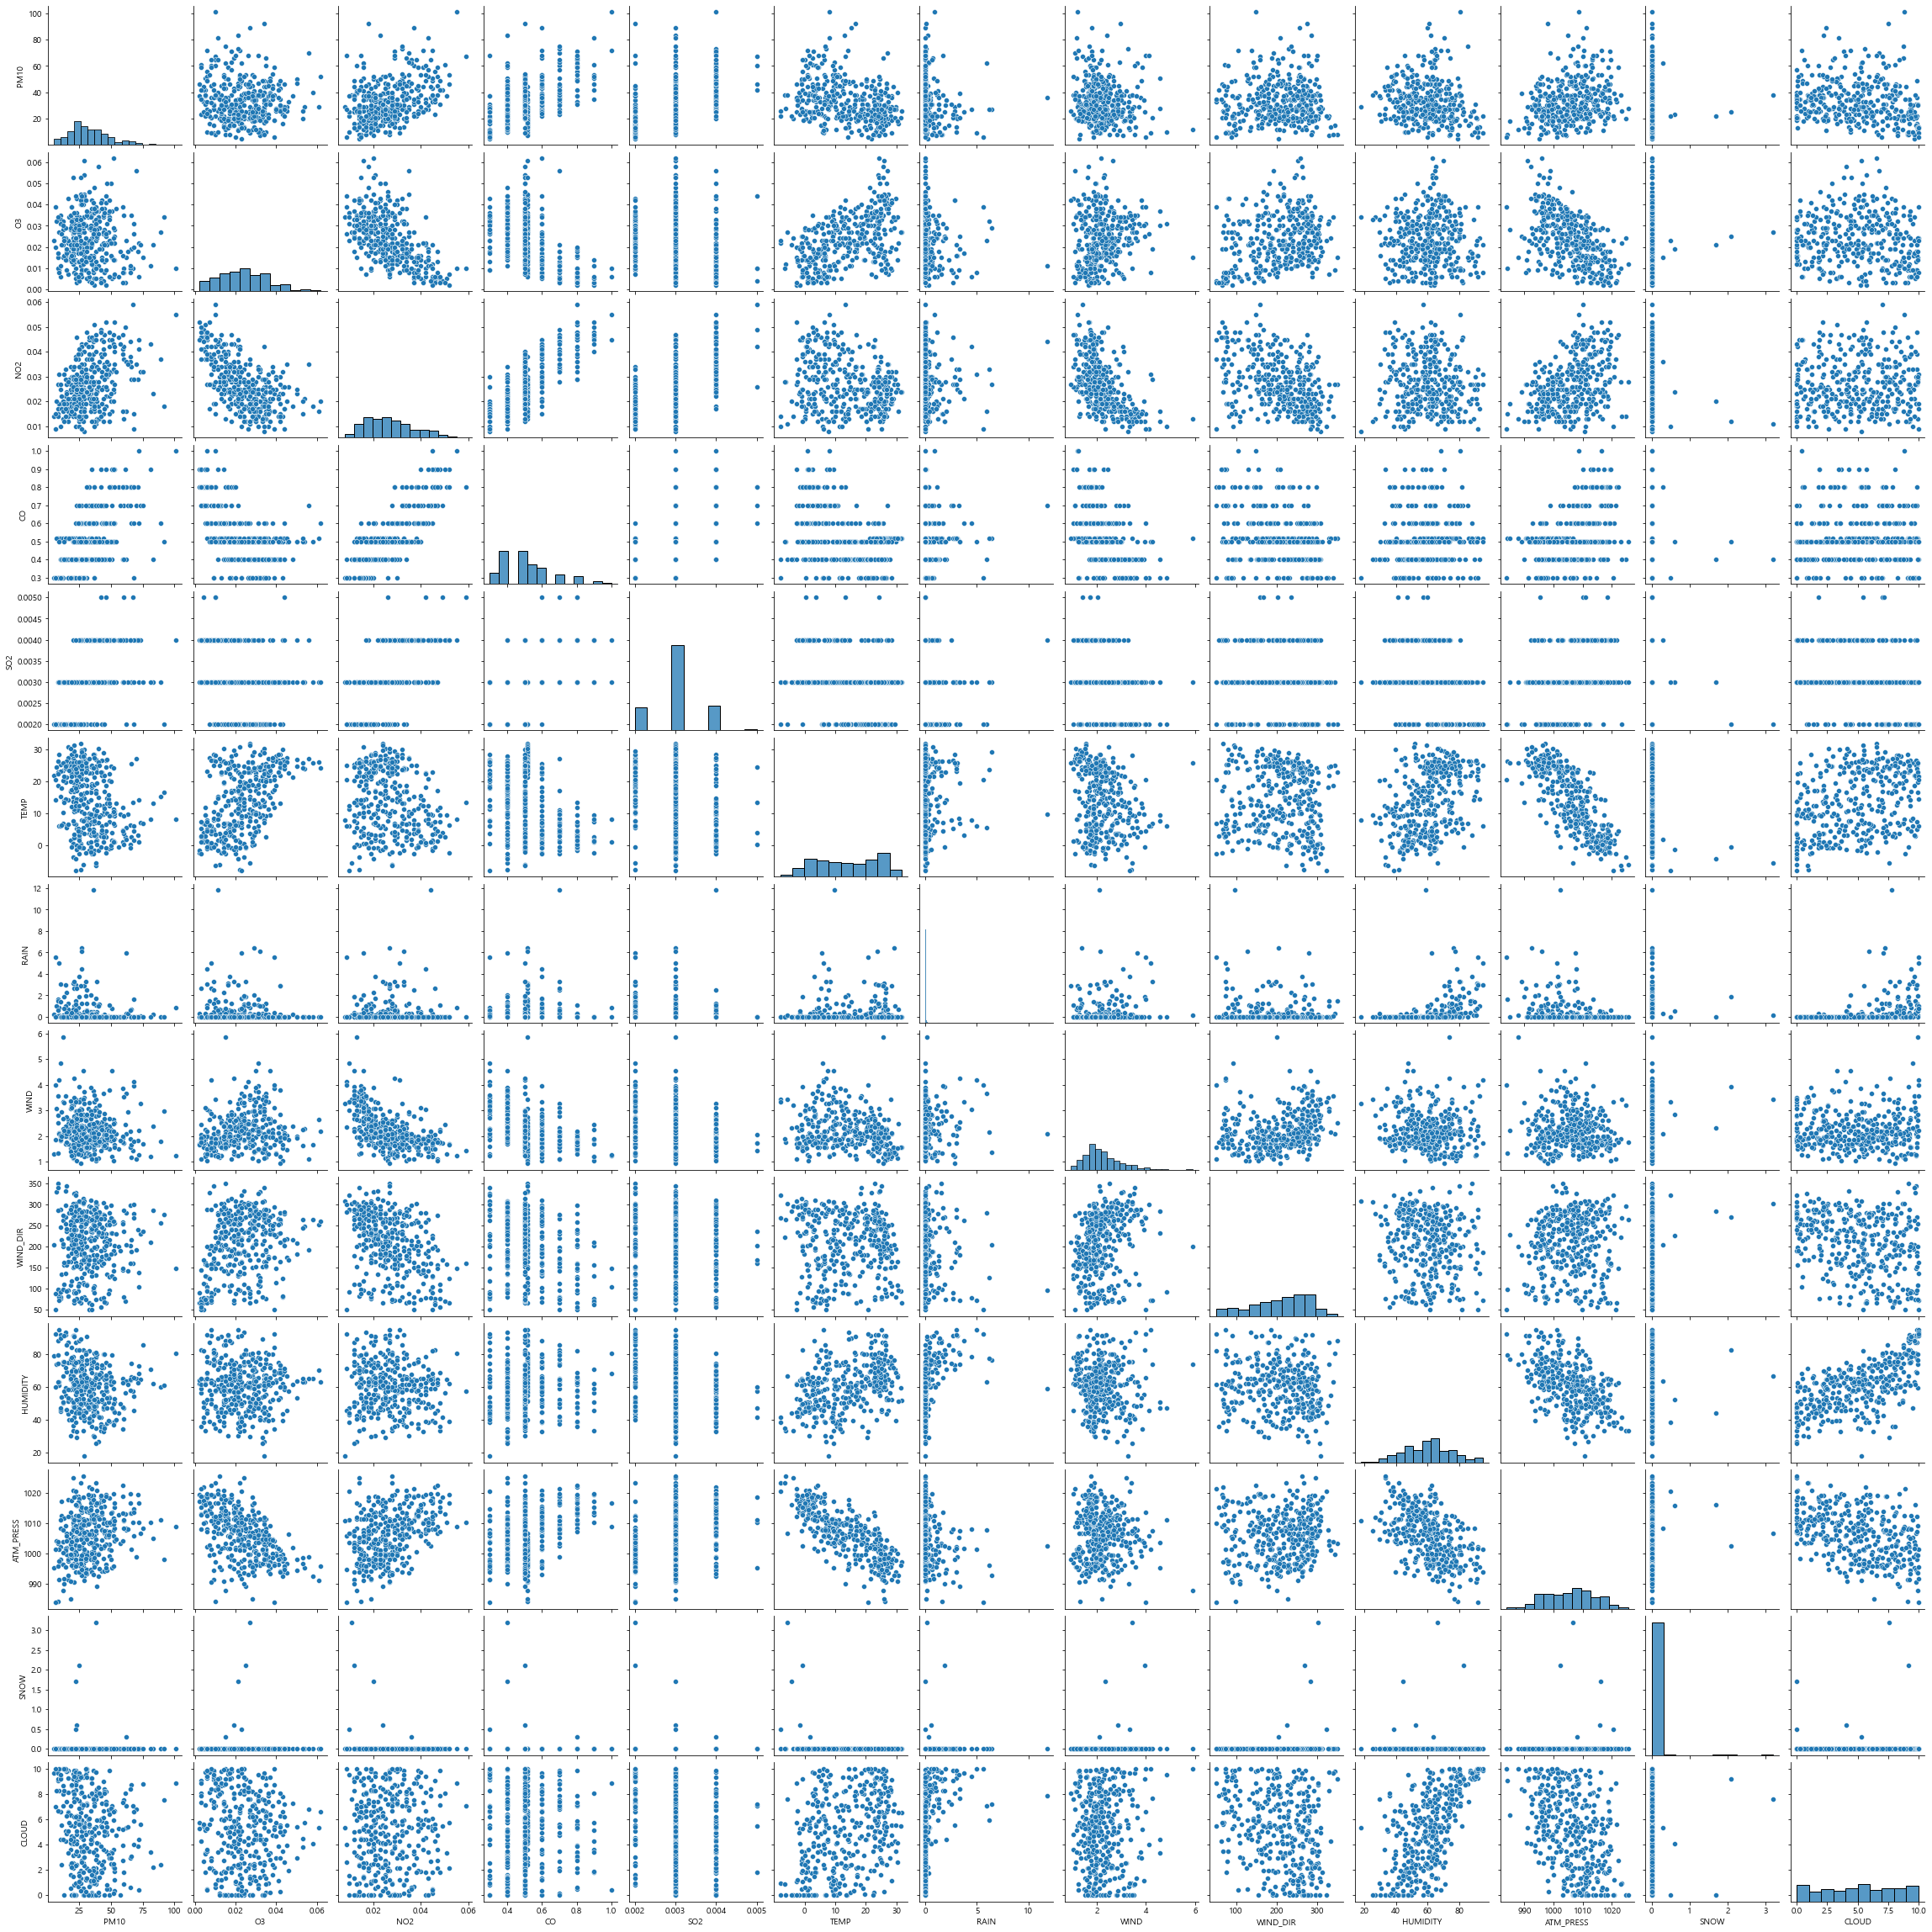

In [38]:
sns.pairplot(df_raw)

# 모델링 및 평가

### 다중회귀분석

In [188]:
df_raw.drop(['MeasDate'], axis = 1, inplace = True)

# 날짜를 나타내는 컬럼과 SNOW, RAIN은 삭제하고시작한다.

In [189]:
df_raw.head()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70
1,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83
2,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29
3,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54
4,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92


In [190]:
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept) 자동 추가. 코드 중간에서 줄 바꿈 “\” 추가
reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + TEMP + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + CLOUD + RAIN + SNOW", data = df_raw)
reg_result = reg_model.fit()

print(reg_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     29.24
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           6.70e-46
Time:                        11:22:32   Log-Likelihood:                -1401.8
No. Observations:                 365   AIC:                             2830.
Df Residuals:                     352   BIC:                             2880.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    433.6651    162.649      2.666      0.0

설명력이 48.2%이고, p 값은 작아 회귀모델로서는 유의한다.
SO2,HUMIDITY ,CLOU 의 P-value 값이 크다.
변수들 간의 다중공선성을 확인해보겠다

In [191]:
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop("PM10", axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x) 
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
11,SNOW,1.112
6,RAIN,1.345
8,WIND_DIR,1.503
4,SO2,1.942
7,WIND,1.945
12,CLOUD,2.086
9,HUMIDITY,2.651
1,O3,2.691
3,CO,3.578
5,TEMP,4.497


다중 공선성이 크게 보이지 않는다.

In [192]:
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
df_raw_y = df_raw["PM10"]

model = LinearRegression()
# 전체 변수 중 7개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 7).fit(df_raw_x, df_raw_y)
# 선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols)) 
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['O3', 'NO2', 'CO', 'SO2', 'RAIN', 'WIND', 'SNOW'], dtype='object')
Removed Variables : Index(['TEMP', 'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'CLOUD'], dtype='object')


후진제거법을 이용하여 유용한 변수들을 7개 선택한다. 

In [194]:
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + WIND + SNOW", data = df_raw)
# 적합
rfe_reg_result = rfe_reg_model.fit()

print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     42.82
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           2.56e-39
Time:                        11:24:28   Log-Likelihood:                -1429.3
No. Observations:                 365   AIC:                             2873.
Df Residuals:                     358   BIC:                             2900.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.0463      5.816     -7.057      0.0

In [200]:
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
df_raw_y = df_raw["PM10"]

model = LinearRegression()
# 전체 변수 중 8개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 8).fit(df_raw_x, df_raw_y)
# 선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols)) 
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['O3', 'NO2', 'CO', 'SO2', 'TEMP', 'RAIN', 'WIND', 'SNOW'], dtype='object')
Removed Variables : Index(['WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'CLOUD'], dtype='object')


In [202]:
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept) 자동 추가. 코드 중간에서 줄 바꿈 “\” 추가
final_reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + RAIN + WIND + SNOW +TEMP", data = df_raw)
final_reg_result = reg_model.fit()

print(final_reg_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     39.79
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           4.38e-45
Time:                        11:28:22   Log-Likelihood:                -1411.4
No. Observations:                 365   AIC:                             2841.
Df Residuals:                     356   BIC:                             2876.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9144      6.108     -4.570      0.0

변수를 골라서 회귀모델을 했을 때 P-vlaue 값은 0.05 보다 작기때문에 회귀모델로서 유의하다.

설명력이 46%로 좋지않은 편이다. 변수를 8개를 선택했을때의 설명력이 그나마 높기에 이 8개를 선택한다.

선택한 변수들의 p-value를 살펴보면 SO2를 제외하고는 모두 유의함을 알 수있다.

<AxesSubplot:>

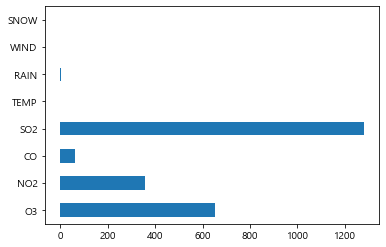

In [204]:
# 설명변수 중요도(표준화 적용 이전)  표준화 회귀계수 산출해야 함
df_reg_coef = pd.DataFrame({"Coef": final_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

# 선형회귀분석에서 변수의 중요도는 기울기의 크기 이다
# 이것은 스켈링 안했을 떄의 크기

변수의 중요도가 SO2, O3, NO2, CO순으로 높다

In [206]:
# 설명변수 표준화 적용  표준화 회귀계수 산출 목적
scaler = StandardScaler()
# Scale 변환대상 변수 : 일반적으로 설명변수
cols = df_raw_x.columns
# Scale 변환
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)
# 목표변수 추가
df_scaled["PM10"]= df_raw["PM10"]
reg_model_scaled = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + RAIN + WIND + SNOW +TEMP", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()

print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     39.79
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           4.38e-45
Time:                        11:31:28   Log-Likelihood:                -1411.4
No. Observations:                 365   AIC:                             2841.
Df Residuals:                     356   BIC:                             2876.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.4219      0.613     54.528      0.0

<AxesSubplot:>

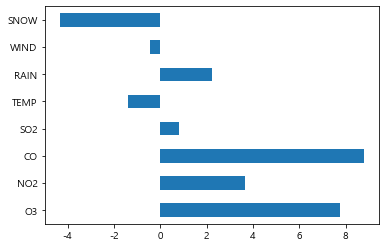

In [207]:
reg_result_scaled_coef = pd.DataFrame({"Coef": reg_result_scaled.params.values[1:]}, index = selected_cols)
reg_result_scaled_coef.plot.barh(y = "Coef", legend = False)

# 표준화 후 설명변수 중요도

scale후 변수의 중요도를 보면 CO, O3, SNOW, NO2, RAIN 순으로중요도가 크다는 것을 알 수 있다.

### 의사결정나무

In [208]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['PM10']
df_raw_x = df_raw.drop('PM10', axis = 1, inplace = False)

In [303]:
# train, test 분리 ( 6:4)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size= 0.4, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (219, 12)
train data Y size : (219,)
test data X size : (146, 12)
test data Y size : (146,)


In [210]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Score on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : -0.160


train 100%, test -1.6%로 과대적합이 보인다.

In [213]:
train_score =[]
test_score=[]
# 잎사귀 노드의 최소자료수 변경에 따른 모델 성능
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234
                                , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,-0.160
1,2,0.935,0.067
2,3,0.833,0.306
3,4,0.777,0.392
4,5,0.746,0.363
5,6,0.687,0.333
6,7,0.636,0.389
7,8,0.628,0.367
8,9,0.619,0.399
9,10,0.590,0.335


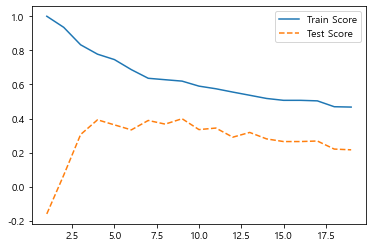

In [214]:
# 모델 설몀력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

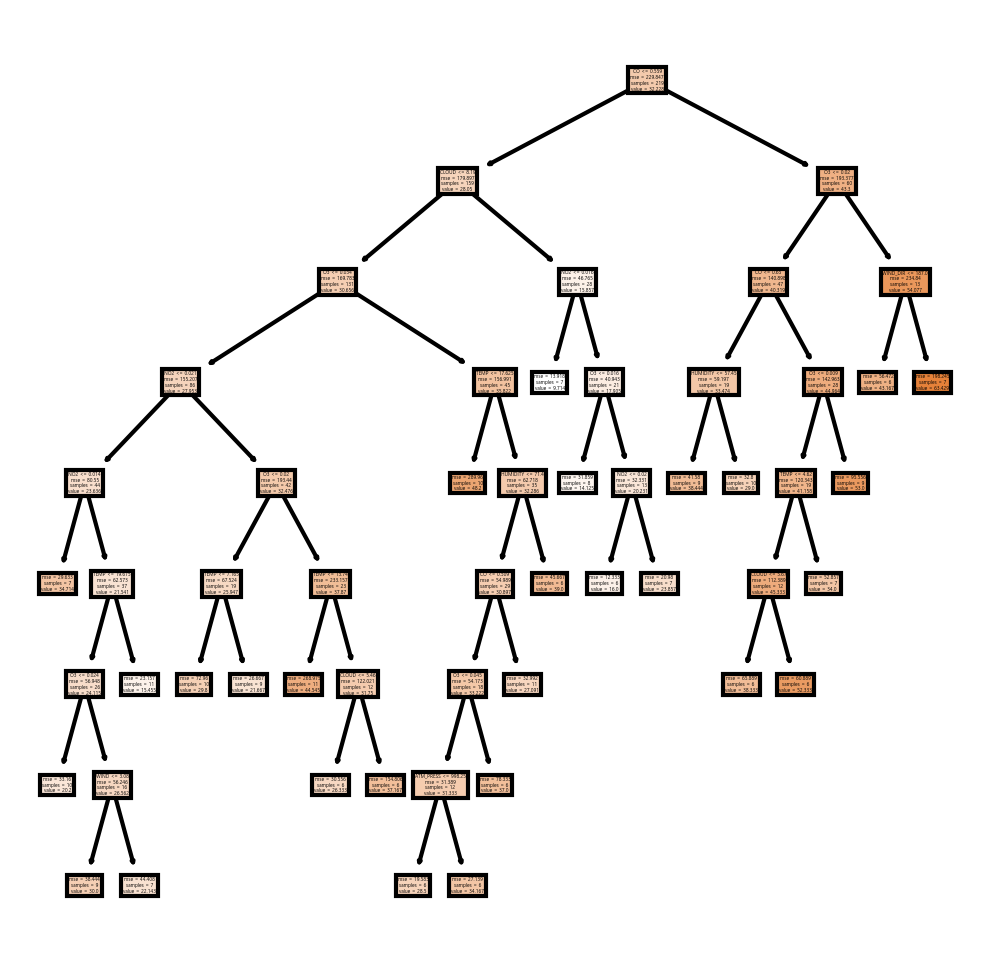

In [215]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 노드의 최소 자료 수=6 모델
tree_graph = DecisionTreeRegressor(random_state=1234,  min_samples_leaf=6 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

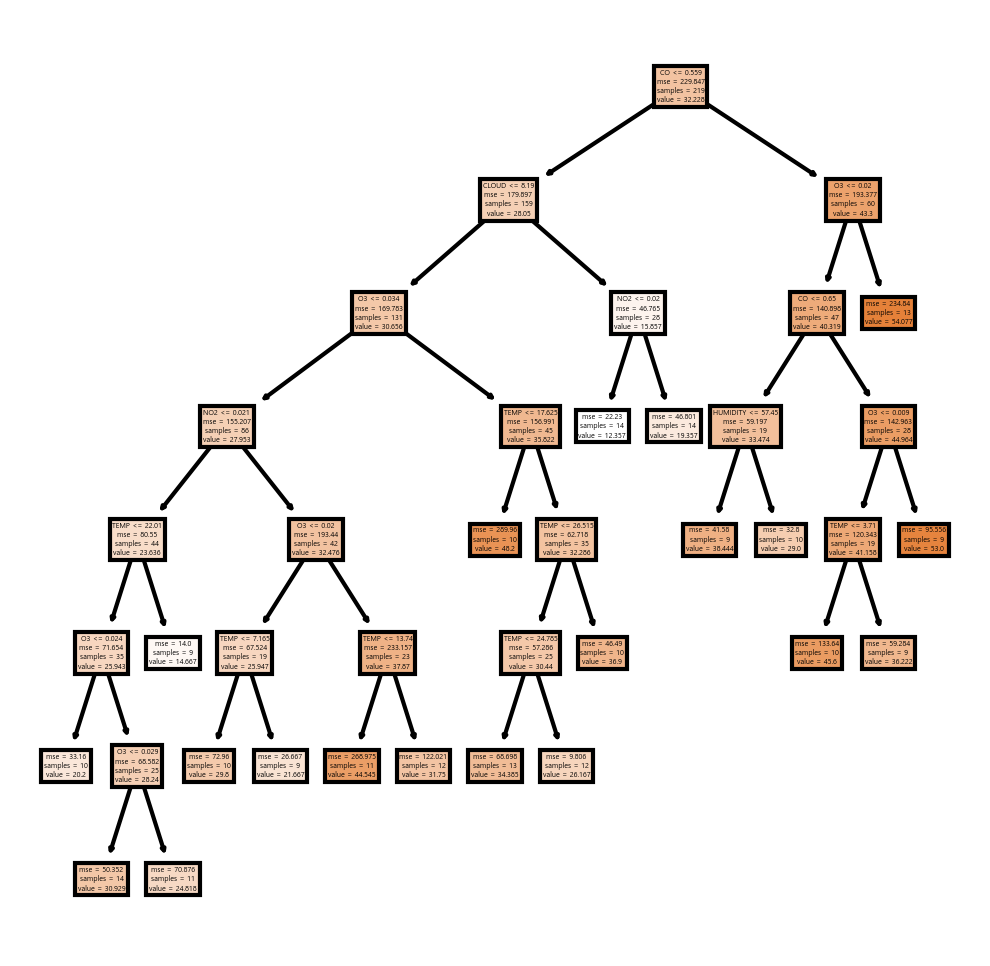

In [216]:
# 노드의 최소 자료 수=9모델
tree_graph = DecisionTreeRegressor(random_state=1234,  min_samples_leaf=9 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

# leaf 는 9로 선택하겠다

In [217]:
train_score = [] 
test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.619,0.399
1,6,0.619,0.399
2,8,0.619,0.399
3,10,0.619,0.399
4,12,0.619,0.399
5,14,0.619,0.399
6,16,0.619,0.399
7,18,0.619,0.399
8,20,0.596,0.390
9,22,0.596,0.390


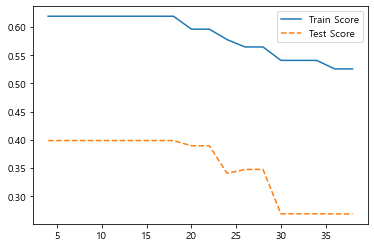

In [218]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

# 성능변화를 고려하여 16 선택

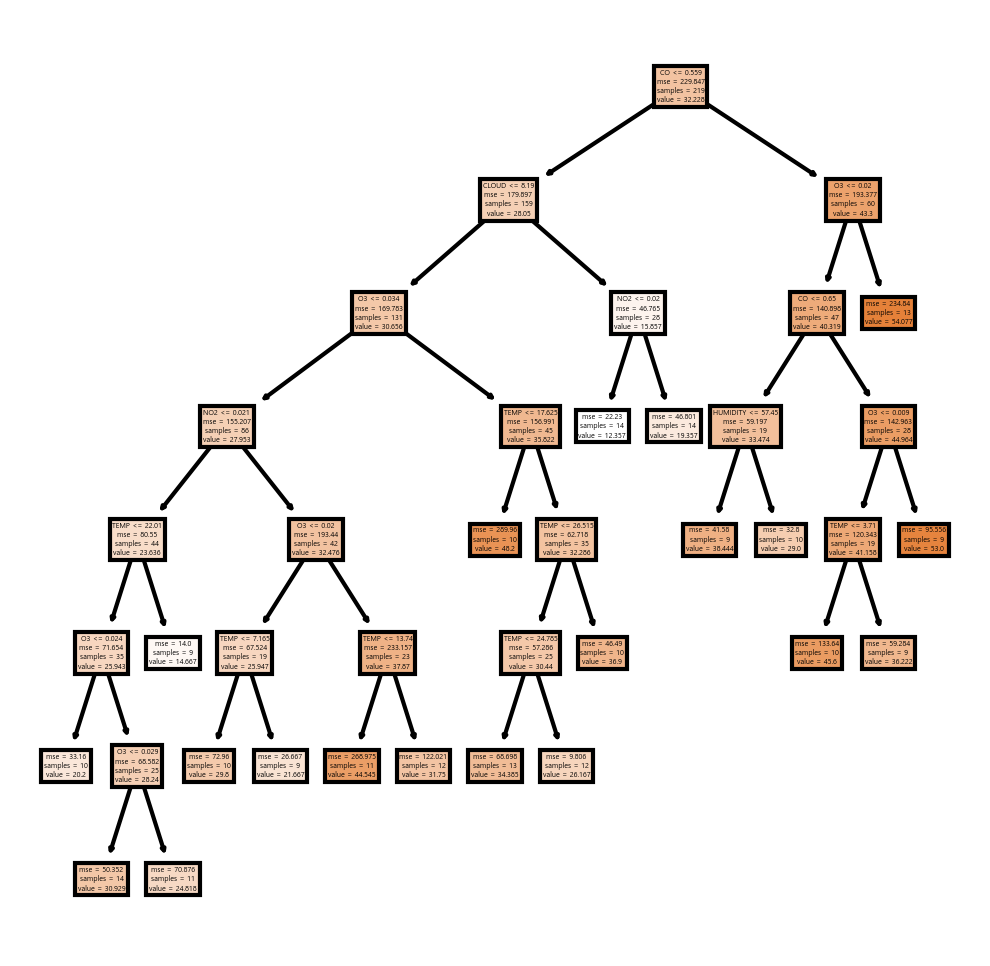

In [219]:
# 분리노드의 최소자료수 = 16모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=16 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

In [220]:
train_score = []
test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=16
                                  , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.201,0.307
1,2,0.340,0.245
2,3,0.413,0.318
3,4,0.511,0.355
4,5,0.572,0.360
5,6,0.615,0.397
6,7,0.619,0.399
7,8,0.619,0.399
8,9,0.619,0.399
9,10,0.619,0.399


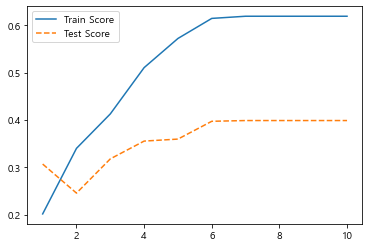

In [221]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

# 깊이는 4하고 6으로 선택해보겠다.

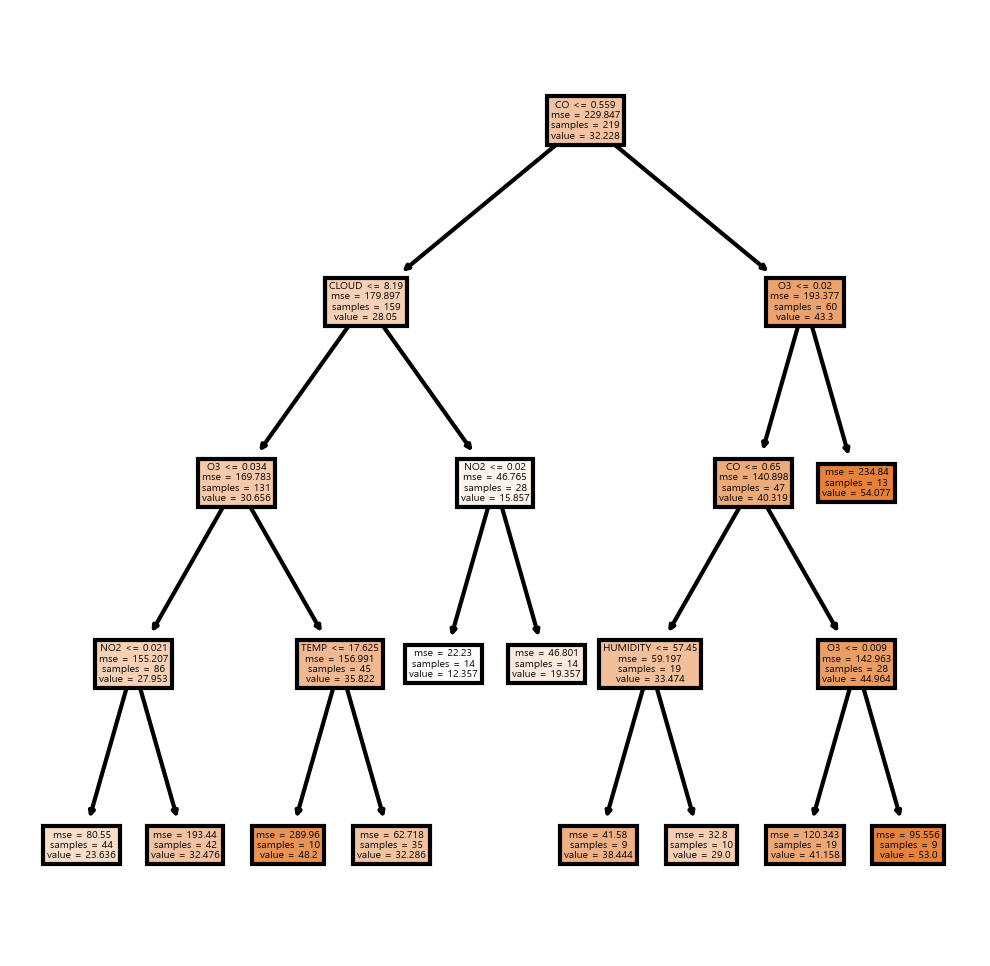

In [228]:
# 최대깊이 = 4 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=16 ,max_depth = 4 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

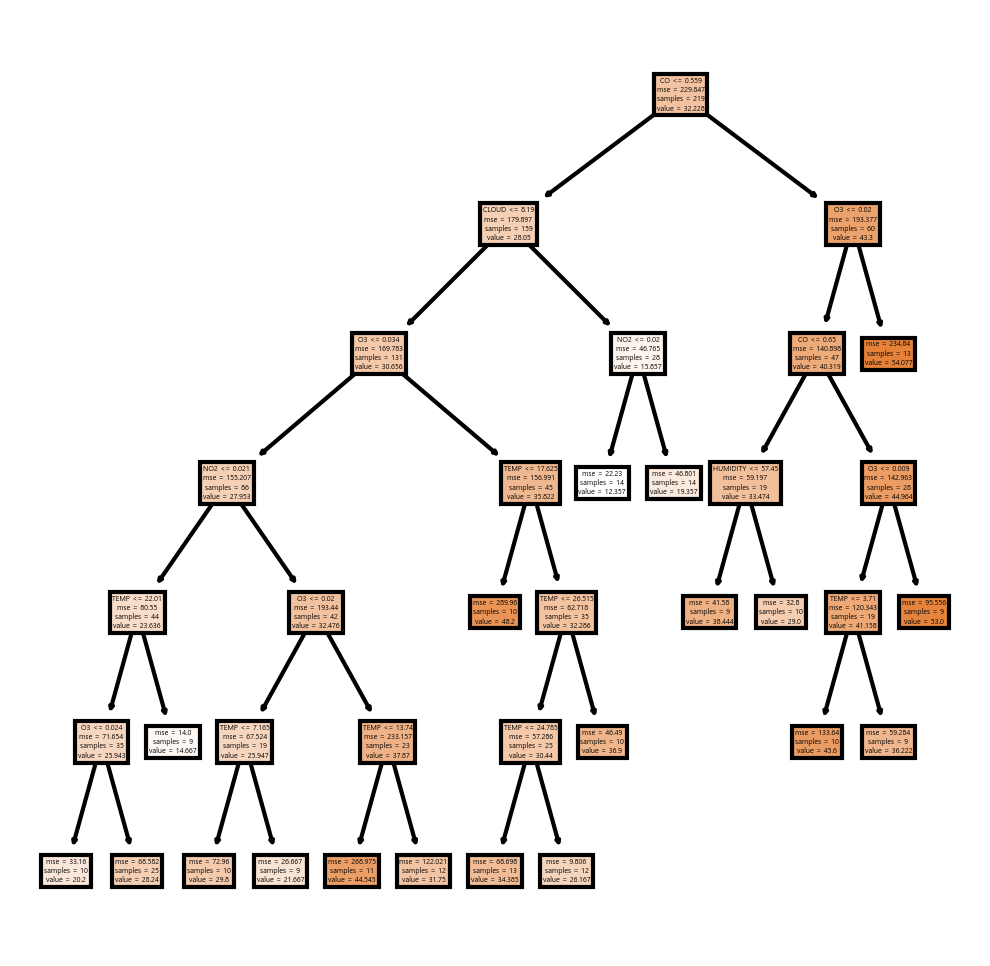

In [229]:
# 최대깊이 = 6 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=16, max_depth = 6)
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

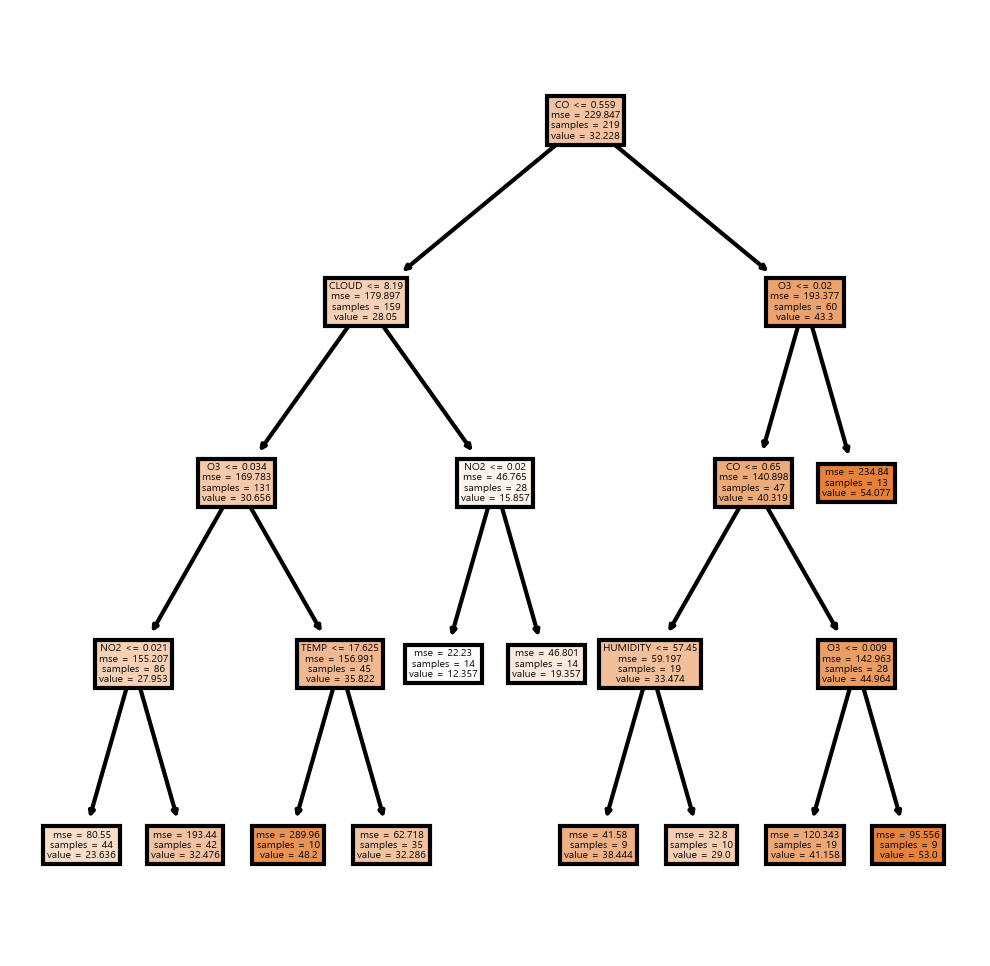

In [230]:
# 최종 모델
tree_final = DecisionTreeRegressor(min_samples_leaf = 9, min_samples_split = 16, max_depth = 4, random_state=1234, )
tree_final.fit(df_train_x, df_train_y)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

# 파라미터는 min_samples_leaf = 9, min_samples_split = 16, max_depth = 4 로 선택하였다

In [231]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.452
11,CLOUD,0.197
0,O3,0.179
1,NO2,0.079
4,TEMP,0.077
8,HUMIDITY,0.016
3,SO2,0.000
5,RAIN,0.000
6,WIND,0.000
7,WIND_DIR,0.000


Text(0, 0.5, '변수')

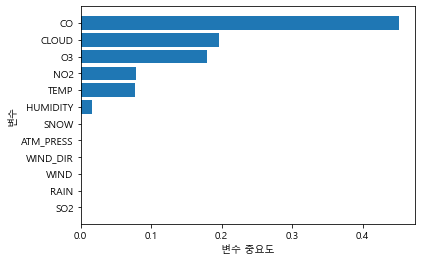

In [232]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

변수의 중요도가 CO, CLOUD, O3, NO2, TEMP, HUMIDITY 순으로 높다. 다중회귀 모델과는 다르지만 둘다 CO, O3의 중요도는 높다.

In [233]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"],
              "max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(criterion='mae', max_depth=10, max_features='auto',
                      min_samples_leaf=9, min_samples_split=20)

best parameter: 
{'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 20}

best score: 
0.31


In [234]:
tree_model = DecisionTreeRegressor(min_samples_leaf = 9, min_samples_split= 20,max_depth=4, random_state = 1234 )

tree_result = tree_model.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Score on training set : {:.3f}'.format(tree_model.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(tree_model.score(df_test_x, df_test_y)))

Score on training set : 0.502
Score on test set : 0.355


그리드 서치를 해본 결과 31%의 성능이 나왔다. 내가 직접 정해준 파마리터로 했을 때의 성능은 train 50.2%, test 35.5%로 좀더 높게 나왔다. 

성능이 좋은 모델이라고는 할 수 없다고 판단된다.

### 랜덤포레스트

In [235]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Score on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.915
Score on test set : 0.452


과대적합이 보인다.

In [236]:
train_score =[]
test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state = 1234,n_estimators =v_n_estimators )
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.859,0.416
1,20,0.897,0.428
2,30,0.902,0.439
3,40,0.907,0.451
4,50,0.909,0.448
5,60,0.909,0.445
6,70,0.910,0.442
7,80,0.913,0.449
8,90,0.913,0.448
9,100,0.915,0.452


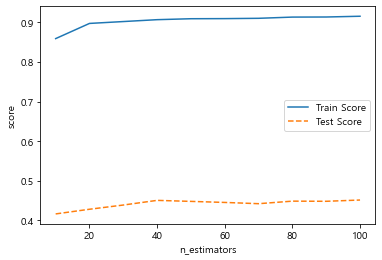

In [237]:
# 모델 설몀력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

# 트리수가 40이상으로 증가해도 설명력이 향상되지 않는다. 최대 트리수는 40으로 결정하겠다.

In [239]:
# 잎사귀 노드의 최소자료수 변경에 따른 모델 성능
train_score =[]
test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf =RandomForestRegressor(random_state = 1234,n_estimators =40,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.907,0.451
1,2,0.859,0.456
2,3,0.806,0.449
3,4,0.767,0.444
4,5,0.724,0.450
5,6,0.686,0.443
6,7,0.656,0.428
7,8,0.635,0.419
8,9,0.612,0.409
9,10,0.591,0.407


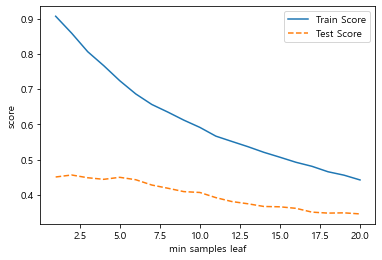

In [240]:
# 모델 설몀력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

# 잎사귀 노드의 최소 자료수 증가에 따ㅏ서 모델의 설명력이 감소한다. min_sample_leaf는 5로 설정하겠다.

In [241]:
# 분리노드의 최소자료수 변경에 따른 모델 성능
train_score = [] 
test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, min_samples_leaf=5,
                         n_estimators =40, min_samples_split=v_min_samples_split )
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.724,0.450
1,6,0.724,0.450
2,8,0.724,0.450
3,10,0.724,0.450
4,12,0.706,0.444
5,14,0.686,0.436
6,16,0.672,0.434
7,18,0.662,0.432
8,20,0.645,0.428
9,22,0.628,0.422


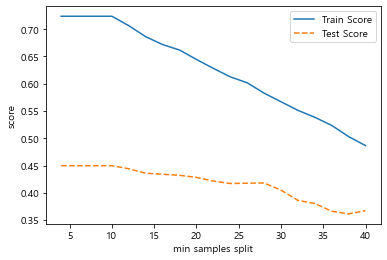

In [242]:
# 모델 설몀력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()
# 분리노듸 최소 자료수 증가에 따라서 모델의 설명력이 감소되며 성능을 고려하며 10으로 설정해주겠다.

In [243]:
# 최대 깊이 변경에 따른 모델 성능
train_score = []
test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=10
                                  , max_depth = v_max_depth,n_estimators =40)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.221,0.310
1,2,0.389,0.322
2,3,0.506,0.388
3,4,0.605,0.431
4,5,0.666,0.445
5,6,0.699,0.453
6,7,0.714,0.453
7,8,0.722,0.448
8,9,0.724,0.449
9,10,0.724,0.450


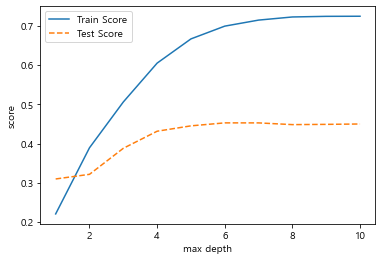

In [244]:
# 모델 설몀력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()
# 최대 깊이가 증가에 모델의 설명력은 증가하는 것으로 보인다. 성능을 고려하여 6으로 설정하겠다.

In [245]:
rf_final = RandomForestRegressor(min_samples_leaf = 5, min_samples_split =10 , max_depth = 6, random_state=1234,
                                n_estimators =40)
rf_final.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Score on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

# 모델의 설명력이 train 69.9% test 45.3% 로 train의 설명력은 내려갔고 test의 설명력은 0.001% 증가했다.

Score on training set : 0.699
Score on test set : 0.453


In [246]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.343
0,O3,0.179
11,CLOUD,0.132
4,TEMP,0.095
1,NO2,0.064
7,WIND_DIR,0.063
6,WIND,0.036
8,HUMIDITY,0.035
9,ATM_PRESS,0.031
5,RAIN,0.018


Text(0, 0.5, '변수')

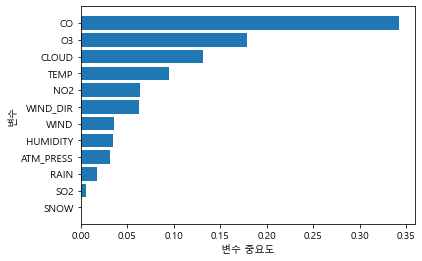

In [247]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

변수의 중요도는 CO O3, CLOUD, TEMP, NO2, WIND_DIR, WIND 순으로 나타난다. 의사 결정나무와의 중요도가 다소 비슷하다.

의사 결정나무에서는 보이지 않았던 WIND_DIR와 WIND가 추가적으로 중요도순위에서 보인다.

In [248]:
# GridSearchCV를 이용한 최적 parameter 찾기

estimator = RandomForestRegressor(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,"min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=6,
                      random_state=1234)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 6}

best score: 
0.382


설명력이 38.2%이다 설명력이 좋은 모델이라고 판단하기 어렵다

### 그래디언트 부스팅

In [249]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Score on training set : {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.946
Score on test set : 0.469


In [250]:
train_score =[]
test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234,n_estimators =v_n_estimators )
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.481,0.322
1,20,0.664,0.412
2,30,0.753,0.444
3,40,0.814,0.479
4,50,0.857,0.480
5,60,0.892,0.468
6,70,0.909,0.471
7,80,0.922,0.467
8,90,0.936,0.466
9,100,0.946,0.469


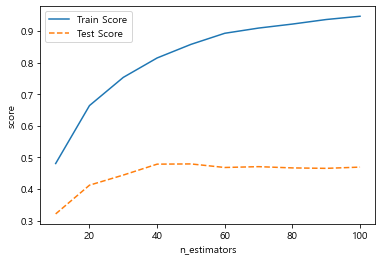

In [251]:
# 모델 설몀력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

# 트리수 증가에 따라서 모델의 설명력은 증가하다가 40 이후로부터는 변화가 크게 없어보이므로 트리수는 40으로 설정

In [274]:
# 잎사귀 노드의 최소자료수 변경에 따른 모델 성능
train_score =[]
test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb =GradientBoostingRegressor(random_state = 1234,n_estimators =40,
                                min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.814,0.479
1,2,0.797,0.482
2,3,0.792,0.505
3,4,0.779,0.508
4,5,0.789,0.489
5,6,0.775,0.469
6,7,0.752,0.465
7,8,0.757,0.457
8,9,0.750,0.478
9,10,0.752,0.477


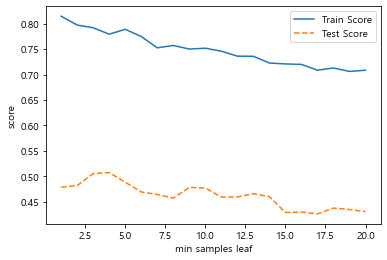

In [275]:
# 모델 설몀력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

# 잎사귀 노드의 최소 자료수 증가에따라서 설명력이 점점감소한다. 4로 설정한다.

In [276]:
# 분리노드의 최소자료수 변경에 따른 모델 성능
train_score = [] 
test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, min_samples_leaf=4,
                         n_estimators =40, min_samples_split=v_min_samples_split )
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.779,0.508
1,4,0.779,0.508
2,6,0.779,0.508
3,8,0.779,0.508
4,10,0.779,0.498
5,12,0.773,0.488
6,14,0.760,0.500
7,16,0.772,0.493
8,18,0.761,0.501
9,20,0.759,0.505


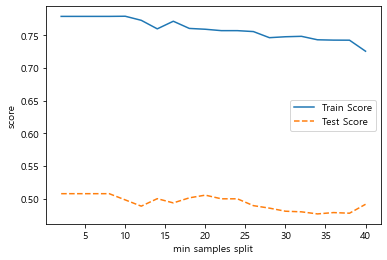

In [277]:
# 모델 설몀력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

# 분리노드의 최소자료수가 증가함에 따라 크게 설명력이 떨어지는 것처럼 보인다. 20으로 설정.

In [278]:
# 최대 깊이 변경에 따른 모델 성능
train_score = []
test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, min_samples_leaf=4, min_samples_split=20
                                  , max_depth = v_max_depth,n_estimators =40)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.387,0.307
1,2,0.613,0.455
2,3,0.759,0.505
3,4,0.860,0.457
4,5,0.916,0.478
5,6,0.936,0.479
6,7,0.948,0.485
7,8,0.955,0.443
8,9,0.958,0.449
9,10,0.956,0.442


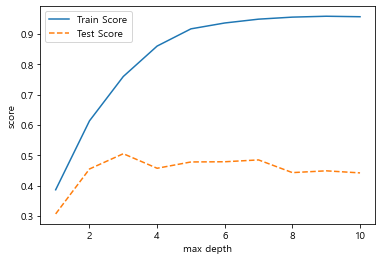

In [279]:
# 모델 설몀력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

# 깊이가 증가하면서 설명력이 증가하는 것처럼 보이지만 test 설명력은 다시 떨어지는 것처럼 보인다. 3으로 설정.

In [280]:
# 학습률 변경에 따른 모델 성능
train_score = []
test_score = []
# max_depth: 최대 깊이 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, min_samples_leaf=4, min_samples_split=20
                                  , max_depth = 3,n_estimators =40, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.759,0.505
1,0.2,0.856,0.475
2,0.3,0.920,0.462
3,0.4,0.953,0.385
4,0.5,0.968,0.405
5,0.6,0.982,0.399
6,0.7,0.985,0.269
7,0.8,0.988,0.253
8,0.9,0.993,0.173


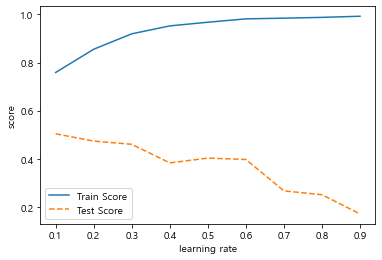

In [281]:
# 모델 설몀력 그래프 확인
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel('score')
plt.xlabel('learning rate')
plt.legend()

#학습률이 증가하면서 설명력이 train 의 설명력은 높아지지만 test는 감소하면서 과적합이 되는 것처럼 판단된다. 0.3으로 설정

In [282]:
gb_final =GradientBoostingRegressor(min_samples_leaf = 4, min_samples_split = 20, max_depth = 3, random_state=1234,
                                n_estimators =40, learning_rate = 0.3)
gb_final.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Score on training set : {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 0.920
Score on test set : 0.462


In [283]:
#변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.294
0,O3,0.169
11,CLOUD,0.135
7,WIND_DIR,0.097
4,TEMP,0.093
9,ATM_PRESS,0.060
8,HUMIDITY,0.058
6,WIND,0.038
1,NO2,0.031
5,RAIN,0.022


Text(0, 0.5, '변수')

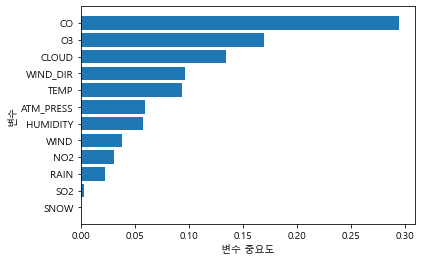

In [284]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

CO, O3, CLOUD, WIND_DIR, TEMP, ATM_PRESS 순으로 중요도가 높게 나온다. 

# 모델평가

In [310]:
#회귀모델
lr_model = smf.ols(formula = 'PM10 ~ O3 + NO2 + CO + SO2 + RAIN + WIND + SNOW +TEMP', data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

# Decision
dt_model = DecisionTreeRegressor(min_samples_leaf = 9, min_samples_split = 20, max_depth = 4, random_state=1234)
dt_model.fit(df_train_x, df_train_y)


# random 
rf_model = RandomForestRegressor(min_samples_leaf = 2, min_samples_split = 6, max_depth = 10, random_state=1234,
                                n_estimators =40)
rf_model.fit(df_train_x, df_train_y)

# gradient
gb_model = GradientBoostingRegressor(min_samples_leaf = 11, min_samples_split = 20, max_depth = 3, random_state=1234,
                                n_estimators =40, learning_rate = 0.3)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     39.79
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           4.38e-45
Time:                        15:06:07   Log-Likelihood:                -1411.4
No. Observations:                 365   AIC:                             2841.
Df Residuals:                     356   BIC:                             2876.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9144      6.108     -4.570      0.0

GradientBoostingRegressor(learning_rate=0.3, min_samples_leaf=11,
                          min_samples_split=20, n_estimators=40,
                          random_state=1234)

In [316]:
models = ['회귀분석', '의사결정나무', '랜덤포레스트',' 그래디언트 부스팅']
mse, rmse, mae, mape = [],[],[],[]

In [317]:
# 회귀분석
# 예측
lr_y_pred = lr_result.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [318]:
# 의사결정나무
# 예측
dt_y_pred =dt_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [319]:
# 랜덤 포레스트
# 예측
rf_y_pred =rf_final.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [320]:
# 그래디언트 부스팅
# 예측
gb_y_pred =gb_final.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

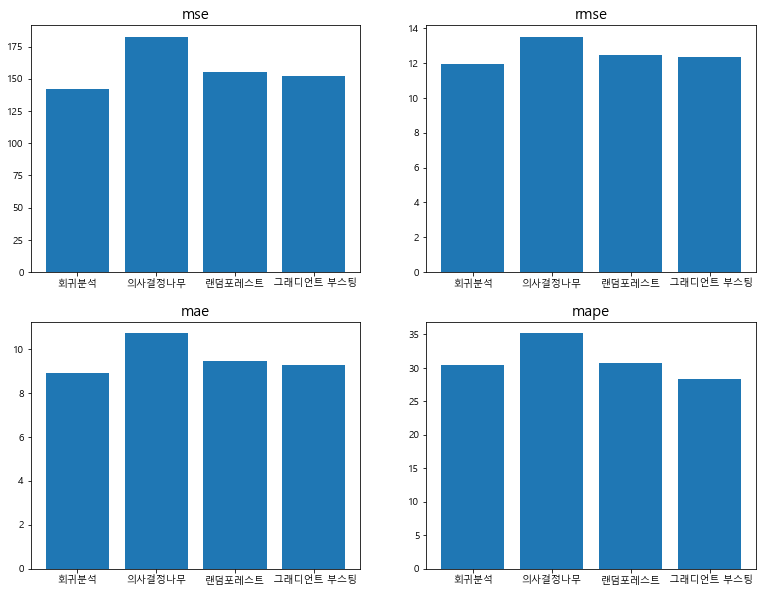

In [321]:
fig, ax = plt.subplots(2, 2, figsize= (13, 10))
ax[0,0].bar(models, mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title('mape').set_fontsize(15)

의사결정나무의 성능이 가장 좋지 않음을 알 수 있다.

또한 회귀분석의 성능이 그나마 제일 나은 것 같다.